# kNN basic practice

## sklearn.neighbors

docs: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.neighbors

examples: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.neighbors

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets, neighbors
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Toy task - only 2 features

In [ ]:
classification_problem = datasets.make_classification(
    n_samples=100,
    n_features=2,
    n_informative=2,
    n_classes=3,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=3,
)

In [ ]:
classification_problem[1]

array([0, 1, 2, 0, 0, 2, 0, 1, 0, 1, 0, 0, 1, 1, 2, 1, 1, 1, 1, 0, 1, 2,
       2, 1, 1, 0, 2, 1, 2, 2, 1, 1, 1, 0, 0, 0, 1, 1, 0, 2, 2, 0, 0, 2,
       0, 1, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 1, 1, 2, 0, 1, 0, 1, 2, 0,
       0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 2, 0, 1, 0, 0, 0, 2, 0, 2,
       1, 2, 0, 1, 2, 1, 1, 1, 1, 2, 0, 2])

In [ ]:
classification_problem[0]

array([[ 1.60271847e+00,  1.62635648e+00],
       [ 1.39819817e+00,  1.49400364e+00],
       [-1.60224795e-01, -6.91268959e-02],
       [ 3.15745706e+00, -2.75440130e+00],
       [ 3.93895392e-01, -8.07197001e-01],
       [-7.53441520e-01, -1.82480476e+00],
       [-7.27862855e-01,  1.72014621e+00],
       [-1.64727501e+00, -1.42290316e+00],
       [-2.12997633e+00,  1.54470859e+00],
       [-2.22398167e+00,  1.38771598e+00],
       [ 2.98146731e+00, -2.03075586e+00],
       [-5.50293651e-02, -4.96496210e-01],
       [ 2.02129176e+00,  2.14465439e+00],
       [ 2.93161342e+00, -2.34928521e+00],
       [-1.80556797e+00,  8.56251394e-01],
       [-2.58715081e+00, -8.65016884e-01],
       [-1.50915827e+00, -1.70269985e-01],
       [-1.32260573e+00, -1.32490911e+00],
       [ 6.70675906e-02, -3.91598271e-01],
       [ 1.08252766e+00,  1.47310211e+00],
       [-9.09492271e-01, -1.92648614e+00],
       [-9.21399352e-01, -2.17477561e+00],
       [-8.01206383e-01, -6.46369404e-01],
       [-1.

In [ ]:
classification_problem[1]

array([0, 1, 2, 0, 0, 2, 0, 1, 0, 1, 0, 0, 1, 1, 2, 1, 1, 1, 1, 0, 1, 2,
       2, 1, 1, 0, 2, 1, 2, 2, 1, 1, 1, 0, 0, 0, 1, 1, 0, 2, 2, 0, 0, 2,
       0, 1, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 1, 1, 2, 0, 1, 0, 1, 2, 0,
       0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 2, 0, 1, 0, 0, 0, 2, 0, 2,
       1, 2, 0, 1, 2, 1, 1, 1, 1, 2, 0, 2])

In [ ]:
def plot_dataset(dataset: (np.ndarray, np.ndarray)):
    colors = ListedColormap(["red", "blue", "yellow"])

    plt.figure(figsize=(16, 9))
    plt.grid()
    plt.scatter(dataset[0][:, 0], dataset[0][:, 1], c=dataset[1], cmap=colors, s=100)
    plt.show()

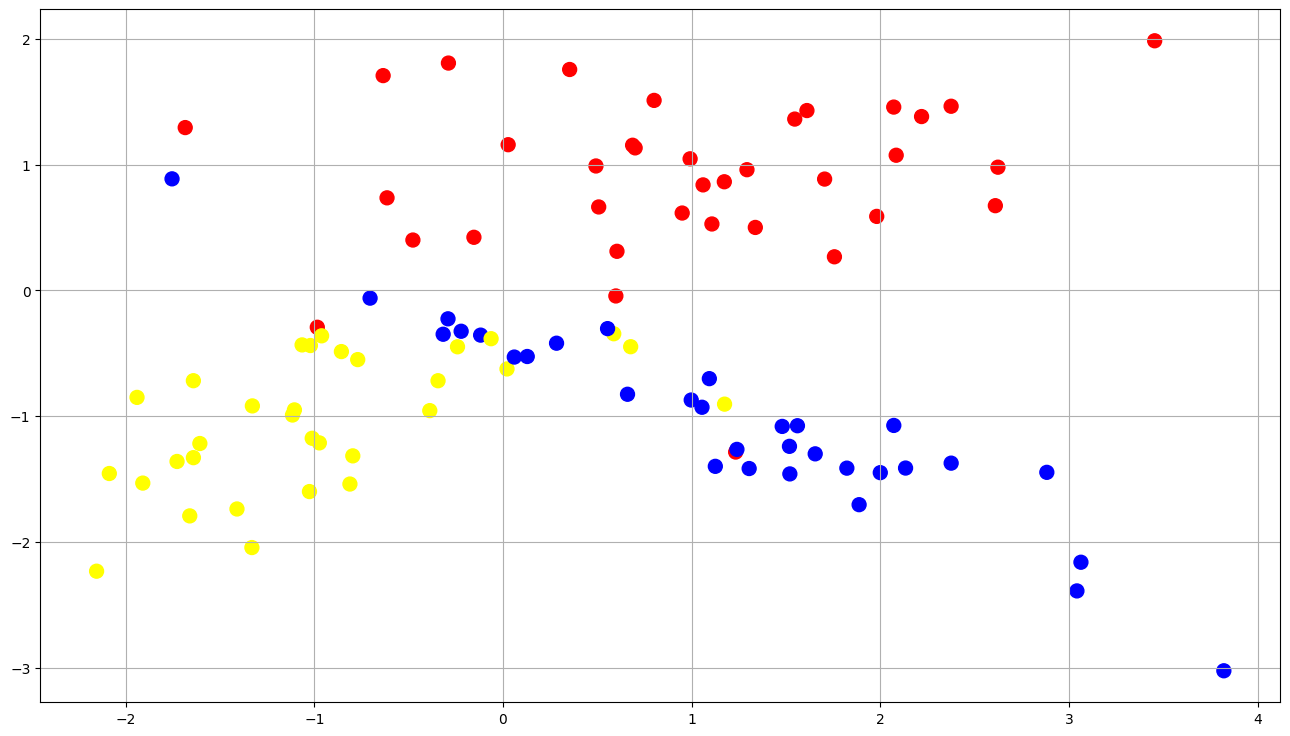

In [ ]:
plot_dataset(classification_problem)

In [ ]:
train_data, test_data, train_labels, test_labels = train_test_split(
    *classification_problem,
    test_size=0.3,
    random_state=12,
)

In [ ]:
test_labels.shape

(30,)

In [ ]:
test_labels

array([1, 0, 2, 2, 2, 1, 2, 1, 2, 0, 1, 0, 2, 1, 1, 0, 1, 1, 0, 1, 0, 2,
       2, 2, 0, 1, 2, 1, 1, 1])

# Let's build our model!

In [ ]:
clf = neighbors.KNeighborsClassifier()
clf.fit(train_data, train_labels)

KNeighborsClassifier()

In [ ]:
predictions = clf.predict(test_data)
accuracy_score(predictions, test_labels)

0.8

In [ ]:
predictions

array([1, 0, 2, 1, 1, 1, 1, 2, 2, 1, 2, 0, 2, 1, 1, 0, 1, 1, 0, 1, 0, 2,
       2, 2, 0, 1, 2, 1, 1, 1])

In [ ]:
test_labels

array([1, 0, 2, 2, 2, 1, 2, 1, 2, 0, 1, 0, 2, 1, 1, 0, 1, 1, 0, 1, 0, 2,
       2, 2, 0, 1, 2, 1, 1, 1])

### And visualize

In [ ]:
def make_meshgrid(
    data: np.ndarray,
    step: float = 0.05,
    border: float = 0.5,
):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

In [ ]:
def plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels):
    colors = ListedColormap(["red", "blue", "yellow"])
    light_colors = ListedColormap(["lightcoral", "lightblue", "lightyellow"])

    # fit model
    estimator.fit(train_data, train_labels)

    # set figure size
    fig = plt.figure(figsize=(16, 6))
    fig.suptitle(estimator)

    # plot decision surface on the train data
    plt.subplot(1, 2, 1)
    xx, yy = make_meshgrid(train_data)
    mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    plt.pcolormesh(xx, yy, mesh_predictions, cmap=light_colors, shading="auto")
    plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, cmap=colors)
    acc = accuracy_score(train_labels, estimator.predict(train_data))
    plt.title(f"Train data, accuracy={acc:.2f}")

    # plot decision surface on the test data
    plt.subplot(1, 2, 2)
    plt.pcolormesh(xx, yy, mesh_predictions, cmap=light_colors, shading="auto")
    plt.scatter(test_data[:, 0], test_data[:, 1], c=test_labels, s=100, cmap=colors)
    acc = accuracy_score(test_labels, estimator.predict(test_data))
    plt.title(f"Test data, accuracy={acc:.2f}")

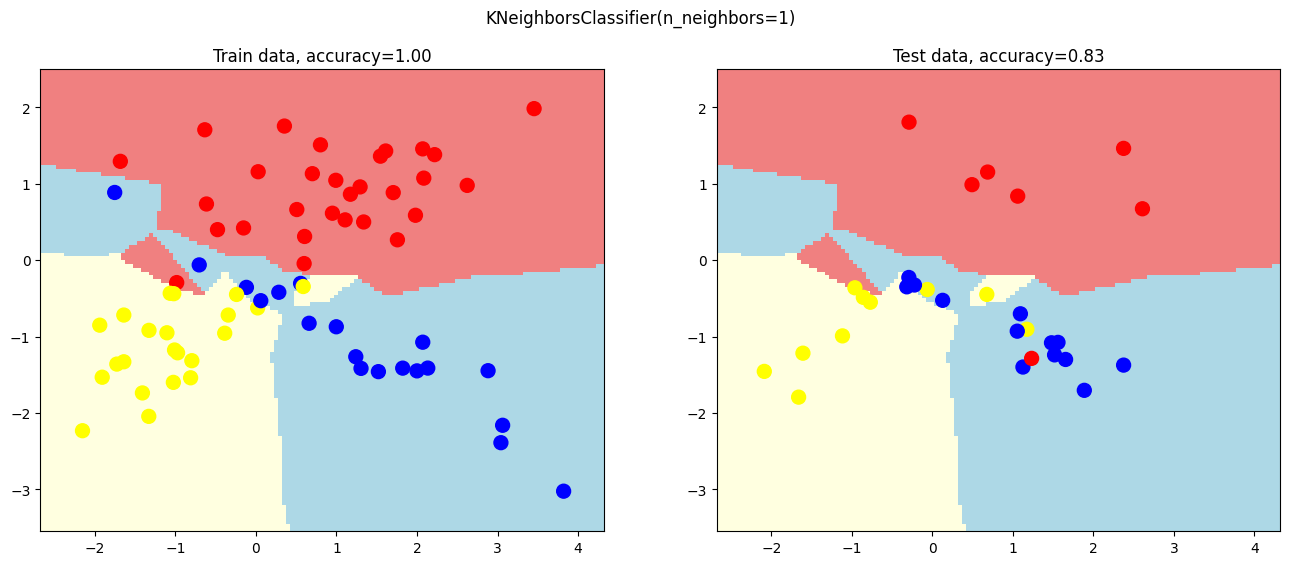

In [ ]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=1)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

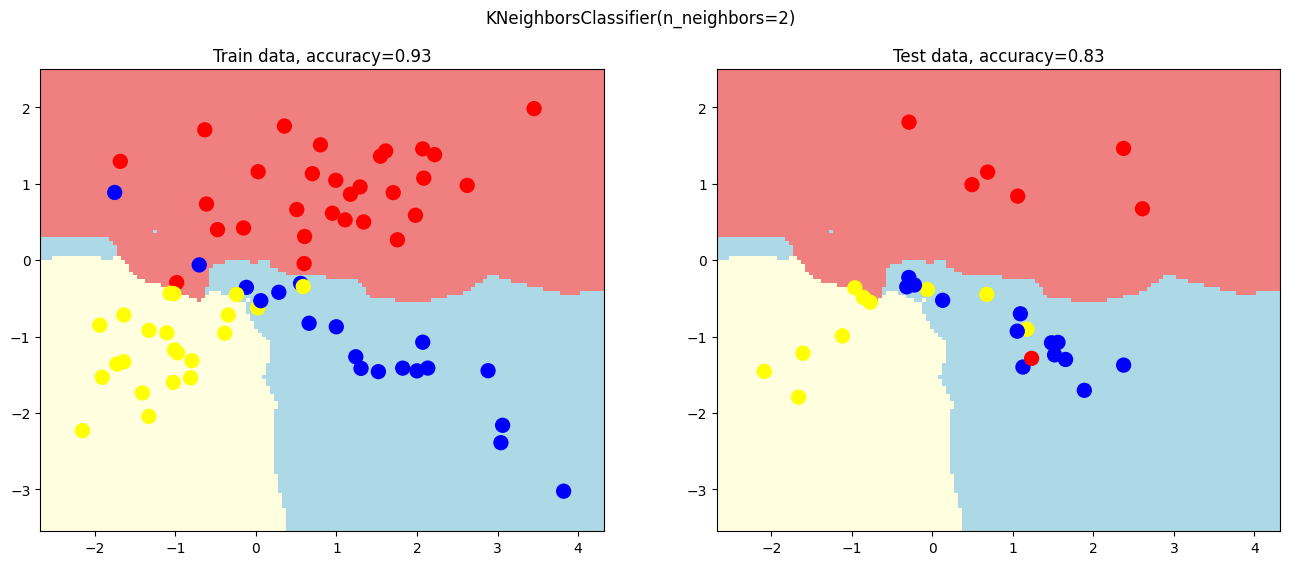

In [ ]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=2)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

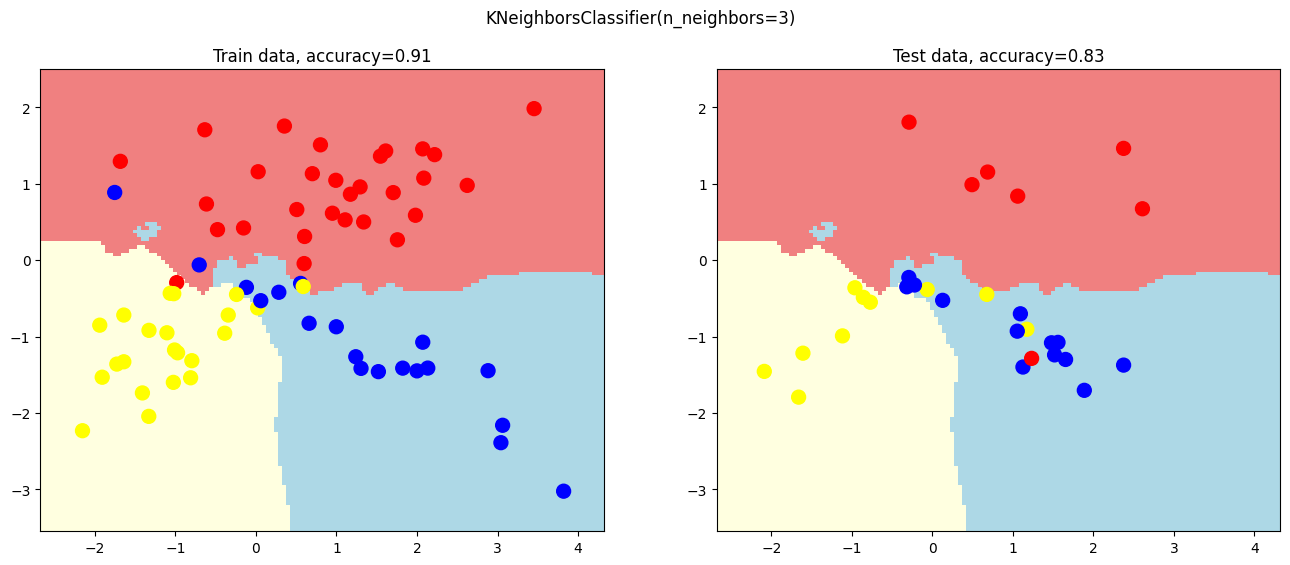

In [ ]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=3)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

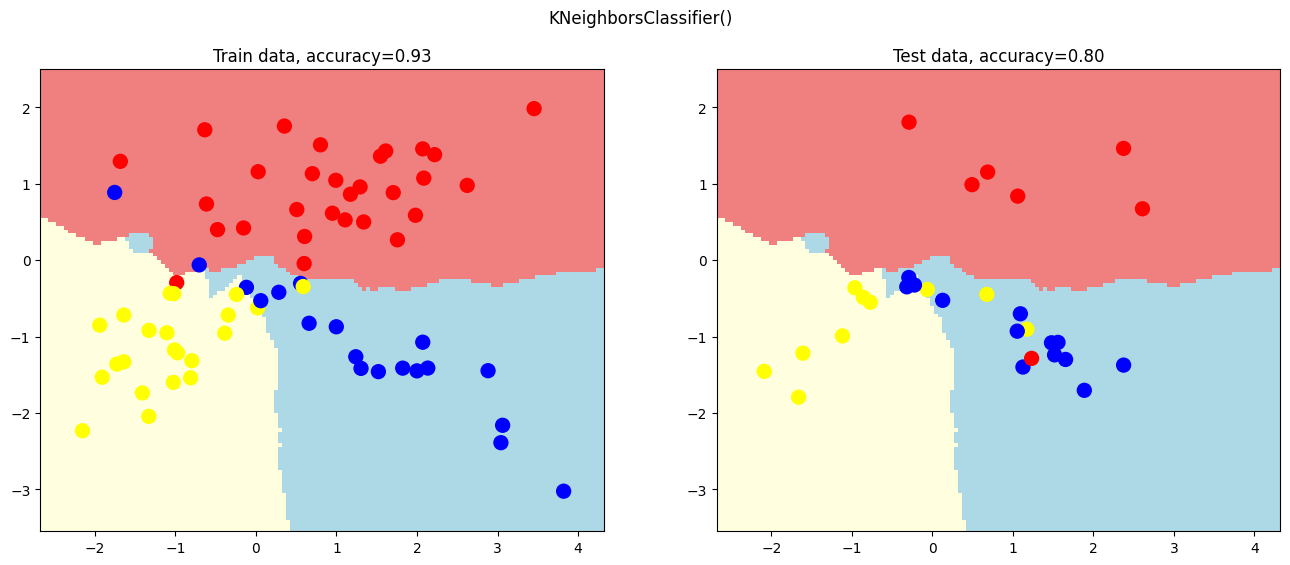

In [ ]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=5)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

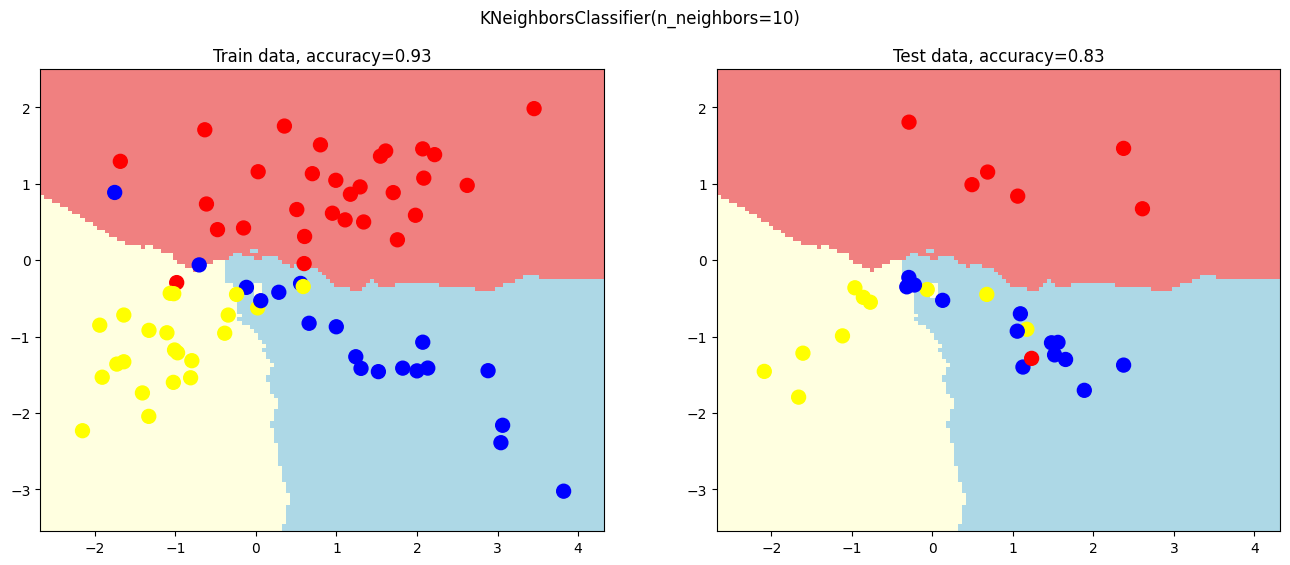

In [ ]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=10)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

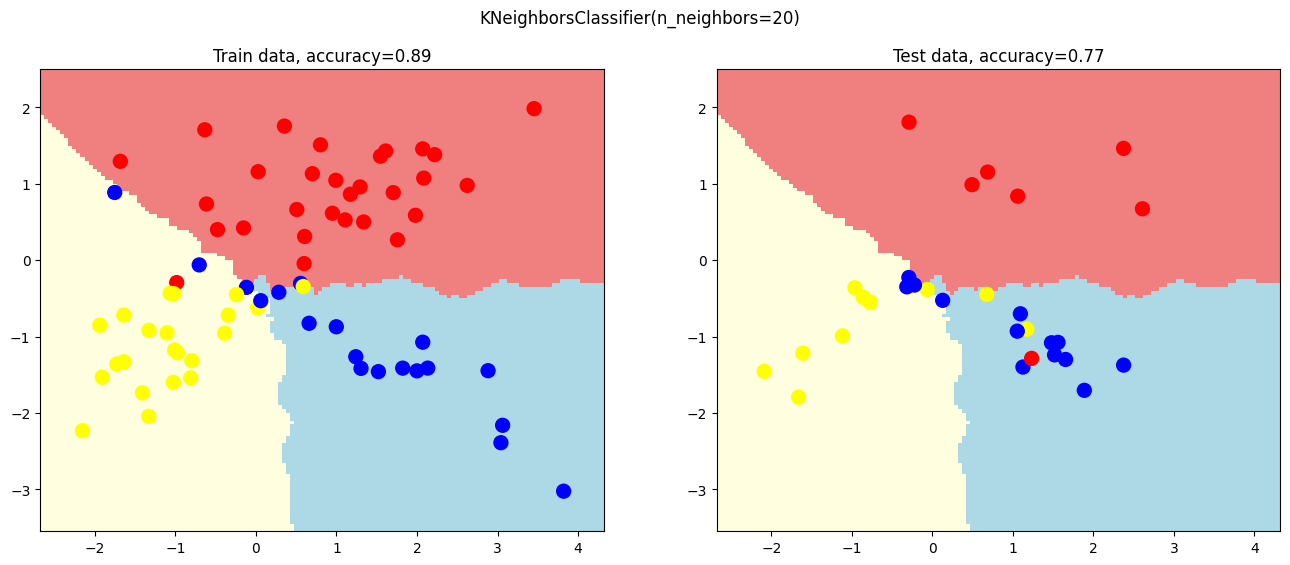

In [ ]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=20)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

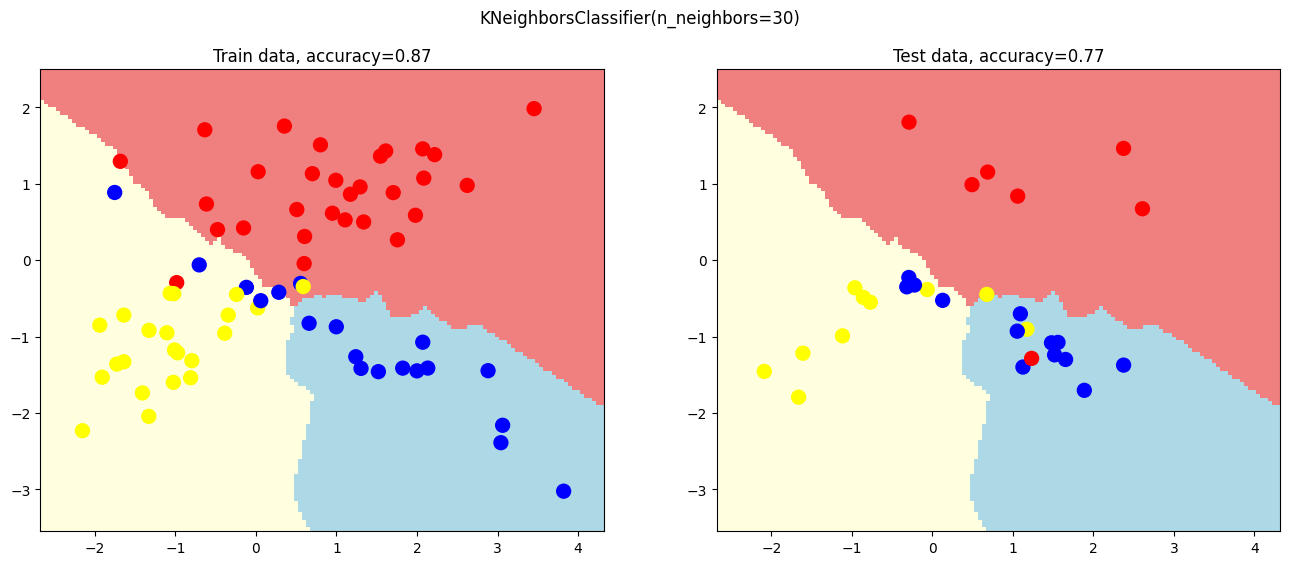

In [ ]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=30)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

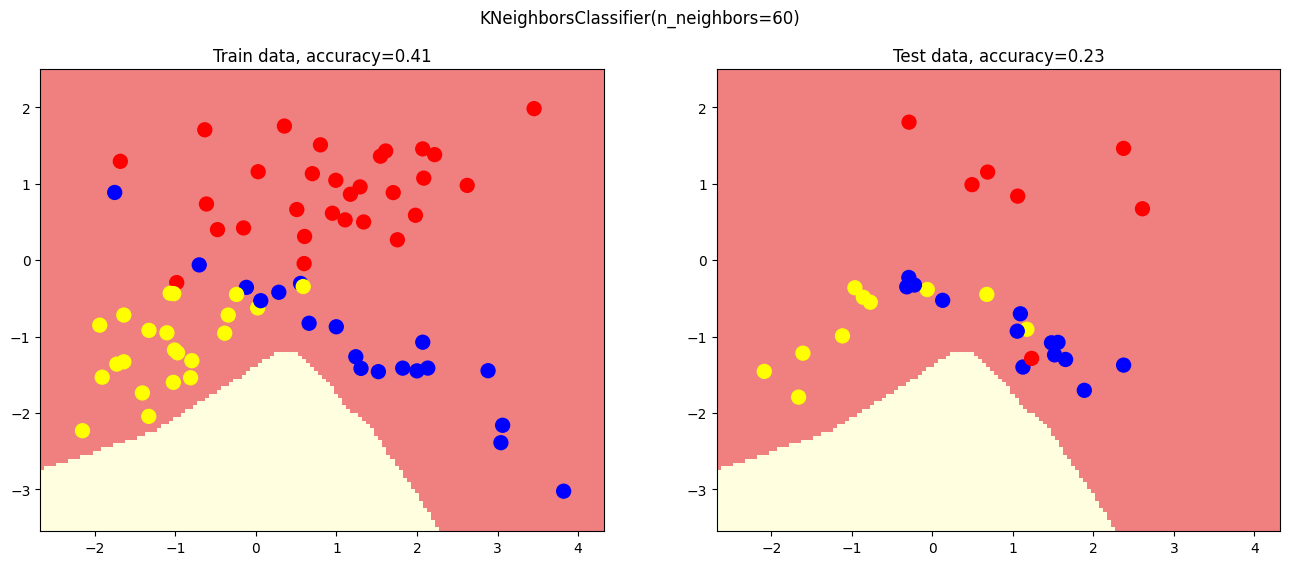

In [ ]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=60)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

## Seems good!

In [ ]:
hard_problem = datasets.make_classification(
    n_samples=100,
    n_features=100,
    n_informative=50,
    n_classes=3,
    n_redundant=50,
    n_clusters_per_class=1,
    random_state=42,
)

In [ ]:
train_data, test_data, train_labels, test_labels = train_test_split(
    *hard_problem,
    test_size=0.3,
    random_state=1,
)

In [ ]:
clf = neighbors.KNeighborsClassifier(n_neighbors=3)
clf.fit(train_data, train_labels)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
predictions = clf.predict(test_data)
accuracy_score(test_labels, predictions)

0.6666666666666666

## Or not so good...

In [ ]:
def train_knn_classifier(dimensions, n_classes):
    scores = []

    for dim in dimensions:
        problem = datasets.make_classification(
            n_samples=1000,
            n_features=dim,
            n_informative=dim // 2,
            n_classes=5,
            n_redundant=dim // 2,
            n_clusters_per_class=1,
            random_state=42,
        )

        train_data, test_data, train_labels, test_labels = train_test_split(
            problem[0],
            problem[1],
            test_size=0.3,
            random_state=1,
        )

        clf = neighbors.KNeighborsClassifier(n_neighbors=5)
        clf.fit(train_data, train_labels)

        predictions = clf.predict(test_data)
        acc = accuracy_score(test_labels, predictions)

        scores.append(acc)

    plt.figure(figsize=(12, 7))
    plt.plot(dimensions, scores)
    plt.grid()
    plt.show()

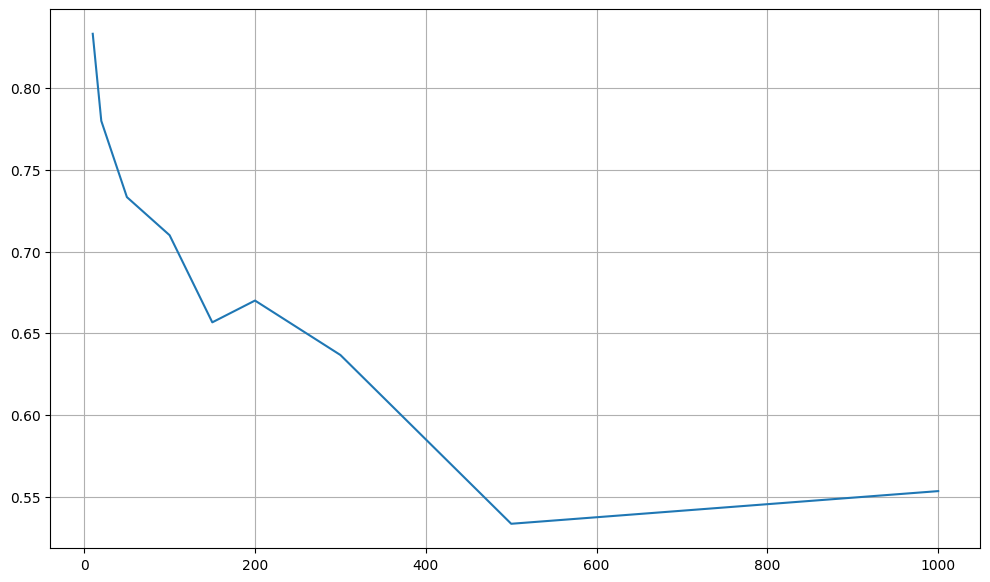

In [ ]:
train_knn_classifier([10, 20, 50, 100, 150, 200, 300, 500, 1000], 5)

# Practice area

Now let's try and train a simple (or not so) kNN classifier on a more complicated dataset.

In [ ]:
# If you are using colab, uncomment this cell

# !curl https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data > ../datasets/wine.csv

In [ ]:
dataset = pd.read_csv("../datasets/wine.csv", header=None)
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
X = dataset.drop(0, axis=1).to_numpy()
y = dataset[0].to_numpy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)

(142, 13)
(36, 13)


In [ ]:
# YOUR CODE HERE

# Bonus area

**Those who gets accuracy of at least 0.8 recieves bonus (0.5 max)**

In [ ]:
# YOUR CODE HERE